In [6]:
#Process speech audio, slice them into 4s per file.

In [1]:
import pandas as pd
import numpy as np
import os
import librosa
import soundfile as sf
import shutil
from tqdm import tqdm
import glob

In [3]:
#Concatenate all audio files in a folder, and slice them into pieces of desired length
def slice_audio(input_dir,output_dir,expected_len,sr = 22050):

    '''
    parameters:
        input_dir: the path of the folder where you saved all the audio file to process
        output_dir: the path of the folder where you want to export the processed audio files
        expected_len: desired length in second of sliced audio
        sr: output sampling rate.(default = 22050 since we are using librosa.load to load in)
    
    '''
    audio_data = []
    file_idx = 0
    
    for file in os.listdir(input_dir):
        if file.endswith('.mp3'):
            print("processing {}".format(file))
            file_path = input_dir + file
            y_data, y_samplerate = librosa.load(file_path)
            audio_data = audio_data + y_data.tolist()
            
            if len(audio_data) > expected_len * sr:
                #Slice audio
                audio_data_np = np.asarray(audio_data[0:expected_len * sr], dtype=np.float32)
                #save the audio
                file_path = output_dir + "speech" + str(file_idx) + '-2.wav'
                sf.write(file_path, audio_data_np, sr)
                #update file index and list buffer
                file_idx += 1               
                audio_data = audio_data[expected_len * sr + 1:-1]

#============================================================================
#Speech audio folder
speech_folder = os.getcwd() + '/0_RawAudio_Speech/' 
output_folder = os.getcwd() + '/Exported/' 
sr = 22050
slice_audio(input_dir = speech_folder,
            output_dir = output_folder,
            expected_len = 4,
            sr = 22050)

processing sample-192741.mp3
processing sample-194330.mp3
processing sample-192999.mp3
processing sample-193339.mp3
processing sample-194456.mp3
processing sample-195748.mp3
processing sample-192027.mp3
processing sample-194442.mp3
processing sample-192033.mp3
processing sample-192755.mp3
processing sample-194324.mp3
processing sample-195012.mp3
processing sample-193463.mp3
processing sample-193305.mp3
processing sample-195774.mp3
processing sample-193311.mp3
processing sample-195760.mp3
processing sample-192769.mp3
processing sample-195006.mp3
processing sample-194318.mp3
processing sample-193477.mp3
processing sample-192782.mp3
processing sample-194495.mp3
processing sample-194481.mp3
processing sample-193488.mp3
processing sample-192796.mp3
processing sample-192966.mp3
processing sample-192972.mp3
processing sample-192225.mp3
processing sample-194654.mp3
processing sample-194132.mp3
processing sample-193885.mp3
processing sample-192543.mp3
processing sample-193649.mp3
processing sam

processing sample-193689.mp3
processing sample-193845.mp3
processing sample-192583.mp3
processing sample-194694.mp3
processing sample-194864.mp3
processing sample-193879.mp3
processing sample-194870.mp3
processing sample-193058.mp3
processing sample-194737.mp3
processing sample-195429.mp3
processing sample-192346.mp3
processing sample-192420.mp3
processing sample-194051.mp3
processing sample-192434.mp3
processing sample-194045.mp3
processing sample-194723.mp3
processing sample-192352.mp3
processing sample-193064.mp3
processing sample-195415.mp3
processing sample-195373.mp3
processing sample-193702.mp3
processing sample-192408.mp3
processing sample-195367.mp3
processing sample-194079.mp3
processing sample-193716.mp3
processing sample-193070.mp3
processing sample-195401.mp3
processing sample-192385.mp3
processing sample-194092.mp3
processing sample-193925.mp3
processing sample-194086.mp3
processing sample-195398.mp3
processing sample-193931.mp3
processing sample-194938.mp3
processing sam

processing sample-193277.mp3
processing sample-194518.mp3
processing sample-192141.mp3
processing sample-194530.mp3
processing sample-194256.mp3
processing sample-193539.mp3
processing sample-192627.mp3
processing sample-195148.mp3
processing sample-194242.mp3
processing sample-192633.mp3
processing sample-192155.mp3
processing sample-194524.mp3
processing sample-192800.mp3
processing sample-192814.mp3
processing sample-192182.mp3
processing sample-194295.mp3
processing sample-192828.mp3
processing sample-194281.mp3
processing sample-193288.mp3
processing sample-192196.mp3
processing sample-194280.mp3
processing sample-192829.mp3
processing sample-192197.mp3
processing sample-193289.mp3
processing sample-192183.mp3
processing sample-194294.mp3
processing sample-192815.mp3
processing sample-192801.mp3
processing sample-192632.mp3
processing sample-194243.mp3
processing sample-194525.mp3
processing sample-192154.mp3
processing sample-194531.mp3
processing sample-192140.mp3
processing sam

processing sample-193922.mp3
processing sample-194095.mp3
processing sample-193936.mp3
processing sample-194081.mp3
processing sample-193088.mp3
processing sample-192396.mp3
processing sample-194917.mp3
processing sample-194903.mp3
processing sample-192341.mp3
processing sample-194730.mp3
processing sample-194056.mp3
processing sample-193739.mp3
processing sample-192427.mp3
processing sample-195348.mp3
processing sample-194042.mp3
processing sample-192433.mp3
processing sample-192355.mp3
processing sample-194724.mp3
processing sample-195412.mp3
processing sample-193063.mp3
processing sample-193705.mp3
processing sample-195374.mp3
processing sample-193711.mp3
processing sample-195360.mp3
processing sample-195406.mp3
processing sample-192369.mp3
processing sample-193077.mp3
processing sample-194718.mp3
processing sample-195599.mp3
processing sample-194687.mp3
processing sample-193856.mp3
processing sample-192590.mp3
processing sample-193842.mp3
processing sample-192584.mp3
processing sam

processing sample-195266.mp3
processing sample-194178.mp3
processing sample-193617.mp3
processing sample-195272.mp3
processing sample-193603.mp3
processing sample-193165.mp3
processing sample-195514.mp3
processing sample-194622.mp3
processing sample-192253.mp3
processing sample-192535.mp3
processing sample-194144.mp3
processing sample-192521.mp3


KeyboardInterrupt: 

In [2]:
input_dir = os.getcwd() + '/Trimmed/' 
output_dir = os.getcwd() + '/Trimmed_wav/' 

file_idx = 0
total_duration = 0
max_dur = 0
min_dur = 100

duration_list = []
for file in os.listdir(input_dir):
    if file.endswith('.mp3'):
        
        file_path = input_dir + file
        y_data, y_samplerate = librosa.load(file_path)

        file_duration = round(len(y_data)/y_samplerate,2)
        duration_list.append(file_duration)
        if file_duration > max_dur: 
            max_dur = file_duration
        if file_duration < min_dur: 
            min_dur = file_duration
        total_duration += file_duration
        
        print("processing {}, File duration:{}, Total Duration:{}".format(file,file_duration,total_duration))
        
        output_file_path = output_dir + "speech" + str(file_idx) + '-2.wav'
        sf.write(output_file_path, y_data, 22050)
        file_idx += 1




FileNotFoundError: [Errno 2] No such file or directory: '/Users/anderson675/Documents/Thesis/scripts/jupyternotebook/Trimmed/'

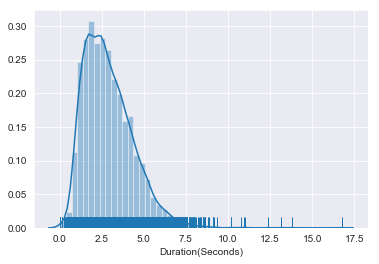

In [25]:
import pandas as pd
x = pd.Series(duration_list, name="Duration(Seconds)")
sns.set_style("darkgrid")
plt = sns.distplot(x,hist=True,rug=True)
fig = plt.get_figure()
#fig.savefig("Speech_data_statistical.png", dpi=1080)

In [23]:
print(max_dur)
print(min_dur)
print(total_duration/9978)

16.75
0.05
2.9016075365804794


In [ ]:
#This is a function that replace the children_playing audio file with speech in UrbanSound8K dataset
#CSV will also be changed that speech file will replace the children_playing
metadatafile = os.getcwd() + '/1_Dataset_Generate/metadata/UrbanSound8K.csv'
metadata = pd.read_csv(metadatafile)
children_playing_metadata = metadata[metadata.classID == 2]
speechfolder = os.getcwd() + '/Exported/'
speech_file_idx = 0
for i,r in children_playing_metadata.iterrows():
    audiofolder = os.getcwd() + '/1_Dataset_Generate/audio/fold{:d}/'.format(r[5])
    audiofile = audiofolder + r[0]
    #Delete original audio file
    os.remove(audiofile)
    
    #put in the speech audio file 
    speech_file_name =  'speech' + str(speech_file_idx) + '-2.wav'
    speechfile = speechfolder + speech_file_name
    shutil.copy(speechfile, audiofolder)
    
    #Change the corresponding metadata infor
    children_playing_metadata.loc[i,'slice_file_name'] = speech_file_name
    children_playing_metadata.loc[i,'class'] = 'speech'
    
    children_playing_metadata.loc[i,'fsID'] = 0
    children_playing_metadata.loc[i,'start'] = 0
    children_playing_metadata.loc[i,'end'] = 0
    children_playing_metadata.loc[i,'salience'] = 0    
    #update parameters
    speech_file_idx += 1
    
new_frames = [metadata[metadata.classID != 2],speech_metadata]
new_metadata = pd.concat(new_frames, sort=False)
new_metadata.to_csv('metadata_with_speech.csv',index=False)

In [ ]:
# Create soundbank for TRAIN (folds 1-6)
#Generate Dataset using pre-sorted data
metadatafile = os.getcwd() + '/1_Dataset_Generate/metadata/metadata_with_speech.csv'
metadata = pd.read_csv(metadatafile)
label_list = sorted(metadata['class'].unique())
print(label_list)

folds = [1, 2, 3, 4, 5, 6]
splitname = 'train'
soundbankfolder = os.getcwd() + '/1_Dataset_Generate/audio/soundbanks/'
soundbankfolder = os.path.join(soundbankfolder, splitname)

label_count = {}
for label in label_list:
    label_count[label] = 0
    
for fold in folds:
    
    print('FOLD {:d}'.format(fold))
    audiofolder = os.getcwd() + '/1_Dataset_Generate/audio/fold{:d}/'.format(fold)
    audiofiles = glob.glob(os.path.join(audiofolder, '*.wav'))
    
    fold_label_count = {}
    for label in label_list:
        fold_label_count[label] = 0
    
    for af in tqdm(audiofiles):
        # print(os.path.basename(af))
        label = metadata.loc[metadata.slice_file_name == os.path.basename(af), 'class'].values[0]
        label_count[label] += 1
        fold_label_count[label] += 1
        destfolder = os.path.join(soundbankfolder, 'foreground', label)
        if not os.path.isdir(destfolder):
            os.mkdir(destfolder)
        destfile = os.path.join(destfolder, os.path.basename(af))
        shutil.copyfile(af, destfile)
        
    # Print fold report
    print('   Fold {:d} labels:'.format(fold))
    for label in label_list:
        print('   {:s}:\t{:d}'.format(label, fold_label_count[label]))
        
# Print overall report
print('\n\nOVERALL labels:')
for label in label_list:
    print('{:s}:\t{:d}'.format(label, label_count[label]))

## Create soundbank for VALIDATE (folds 7-8)

In [200]:
folds = [7, 8]
splitname = 'validate'

soundbankfolder = os.getcwd() + '/1_Dataset_Generate/audio/soundbanks/'
soundbankfolder = os.path.join(soundbankfolder, splitname)

label_count = {}
for label in label_list:
    label_count[label] = 0
    
for fold in folds:
    
    print('FOLD {:d}'.format(fold))
    audiofolder = os.getcwd() + '/1_Dataset_Generate/audio/fold{:d}/'.format(fold)
    audiofiles = glob.glob(os.path.join(audiofolder, '*.wav'))
    
    fold_label_count = {}
    for label in label_list:
        fold_label_count[label] = 0
    
    for af in tqdm(audiofiles):
        # print(os.path.basename(af))
        label = metadata.loc[metadata.slice_file_name == os.path.basename(af), 'class'].values[0]       
        label_count[label] += 1
        fold_label_count[label] += 1
        destfolder = os.path.join(soundbankfolder, 'foreground', label)
        if not os.path.isdir(destfolder):
            os.mkdir(destfolder)
        destfile = os.path.join(destfolder, os.path.basename(af))
        shutil.copyfile(af, destfile)
        
    # Print fold report
    print('   Fold {:d} labels:'.format(fold))
    for label in label_list:
        print('   {:s}:\t{:d}'.format(label, fold_label_count[label]))
        
# Print overall report
print('\n\nOVERALL labels:')
for label in label_list:
    print('{:s}:\t{:d}'.format(label, label_count[label]))

  2%|▏         | 17/838 [00:00<00:04, 168.21it/s]

FOLD 7


  2%|▏         | 18/806 [00:00<00:04, 176.62it/s]

   Fold 7 labels:
   air_conditioner:	100
   car_horn:	28
   dog_bark:	100
   drilling:	100
   engine_idling:	106
   gun_shot:	51
   jackhammer:	76
   siren:	77
   speech:	100
   street_music:	100
FOLD 8


100%|██████████| 806/806 [00:04<00:00, 191.40it/s]

   Fold 8 labels:
   air_conditioner:	100
   car_horn:	30
   dog_bark:	100
   drilling:	100
   engine_idling:	88
   gun_shot:	30
   jackhammer:	78
   siren:	80
   speech:	100
   street_music:	100


OVERALL labels:
air_conditioner:	200
car_horn:	58
dog_bark:	200
drilling:	200
engine_idling:	194
gun_shot:	81
jackhammer:	154
siren:	157
speech:	200
street_music:	200


## Create soundbank for TEST (folds 9-10)

In [201]:
folds = [9, 10]
splitname = 'test'

soundbankfolder = os.getcwd() + '/1_Dataset_Generate/audio/soundbanks/'
soundbankfolder = os.path.join(soundbankfolder, splitname)

label_count = {}
for label in label_list:
    label_count[label] = 0
    
for fold in folds:
    
    print('FOLD {:d}'.format(fold))
    audiofolder = os.getcwd() + '/1_Dataset_Generate/audio/fold{:d}/'.format(fold)
    audiofiles = glob.glob(os.path.join(audiofolder, '*.wav'))
    
    fold_label_count = {}
    for label in label_list:
        fold_label_count[label] = 0
    
    for af in tqdm(audiofiles):
        # print(os.path.basename(af))
        label = metadata.loc[metadata.slice_file_name == os.path.basename(af), 'class'].values[0]
        label_count[label] += 1
        fold_label_count[label] += 1
        destfolder = os.path.join(soundbankfolder, 'foreground', label)
        if not os.path.isdir(destfolder):
            os.mkdir(destfolder)
        destfile = os.path.join(destfolder, os.path.basename(af))
        shutil.copyfile(af, destfile)
        
    # Print fold report
    print('   Fold {:d} labels:'.format(fold))
    for label in label_list:
        print('   {:s}:\t{:d}'.format(label, fold_label_count[label]))
        
# Print overall report
print('\n\nOVERALL labels:')
for label in label_list:
    print('{:s}:\t{:d}'.format(label, label_count[label]))

  2%|▏         | 17/816 [00:00<00:04, 164.56it/s]

FOLD 9


  3%|▎         | 22/837 [00:00<00:03, 210.41it/s]

   Fold 9 labels:
   air_conditioner:	100
   car_horn:	32
   dog_bark:	100
   drilling:	100
   engine_idling:	89
   gun_shot:	31
   jackhammer:	82
   siren:	82
   speech:	100
   street_music:	100
FOLD 10


100%|██████████| 837/837 [00:04<00:00, 193.96it/s]

   Fold 10 labels:
   air_conditioner:	100
   car_horn:	33
   dog_bark:	100
   drilling:	100
   engine_idling:	93
   gun_shot:	32
   jackhammer:	96
   siren:	83
   speech:	100
   street_music:	100


OVERALL labels:
air_conditioner:	200
car_horn:	65
dog_bark:	200
drilling:	200
engine_idling:	182
gun_shot:	63
jackhammer:	178
siren:	165
speech:	200
street_music:	200


## Copy noise excerpt for all files

In [203]:
noisefile = os.getcwd() + '/1_Dataset_Generate/audio/noise/brownian.wav'
soundbankfolder = os.getcwd() + '/1_Dataset_Generate/audio/soundbanks/'

for split in ['train', 'validate', 'test']:
    
    destfolder = os.path.join(soundbankfolder, split, 'background', 'noise')
    if not os.path.isdir(destfolder):
        os.mkdir(destfolder)
        
    destfile = os.path.join(destfolder, os.path.basename(noisefile))
    shutil.copyfile(noisefile, destfile)


In [8]:
import seaborn as sns

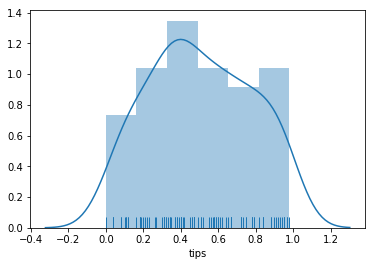

In [12]:
tips

[79,
 63,
 40,
 14,
 88,
 82,
 94,
 83,
 81,
 63,
 46,
 35,
 77,
 4,
 68,
 49,
 81,
 48,
 44,
 91,
 99,
 3,
 10,
 65,
 49,
 83,
 15,
 51,
 39,
 34,
 3,
 22,
 33,
 71,
 4,
 16,
 97,
 73,
 48,
 89,
 28,
 90,
 43,
 94,
 2,
 48,
 56,
 66,
 77,
 9,
 80,
 29,
 89,
 31,
 61,
 85,
 19,
 96,
 76,
 26,
 80,
 53,
 30,
 98,
 67,
 58,
 26,
 5,
 19,
 40,
 42,
 45,
 49,
 45,
 26,
 4,
 69,
 50,
 69,
 91,
 61,
 71,
 17,
 89,
 75,
 14,
 13,
 83,
 32,
 11,
 0,
 38,
 24,
 55,
 14,
 89,
 28,
 84,
 51,
 28]